<a href="https://colab.research.google.com/github/ankitoscar/Machine-Learning/blob/main/book_recommendations_model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book recommendations for model 1

Model 1 deals with recommending books to users based on their favourite books, genres and authors. This notebook will involve 2 models, one which recommends based on favourite author and book, while the other recommends based on favourite genre and book.

In [1]:
# importing data csv file
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/book_recommendations/model1_data.csv')
df = df.sample(frac=1)

In [2]:
df.head()

,Unnamed: 0,Author,Genre,Title
112,112,Katie Mack,science technology,The End of Everything by Katie Mack
42,42,R.F. Kuang,fanatasy,The Burning God by R.F. Kuang
85,85,Stuart Turton,mystery thriller,The Devil and the Dark Water by Stuart Turton
26,26,Bryant Terry,cook books,Vegetable Kingdom by Bryant Terry
114,114,Christiana Figueres,science technology,The Future We Choose by Christiana Figueres


In [3]:
# Drop Unnamed:0 column as it is just a copy of indices
df.drop('Unnamed: 0',axis=1, inplace=True)

In [4]:
df.head()

,Author,Genre,Title
112,Katie Mack,science technology,The End of Everything by Katie Mack
42,R.F. Kuang,fanatasy,The Burning God by R.F. Kuang
85,Stuart Turton,mystery thriller,The Devil and the Dark Water by Stuart Turton
26,Bryant Terry,cook books,Vegetable Kingdom by Bryant Terry
114,Christiana Figueres,science technology,The Future We Choose by Christiana Figueres


In [5]:
# null values in the dataframe
df.isna().sum()

Author    0
Genre     1
Title     0
dtype: int64

In [6]:
# shape of the dataframe
df.shape

(124, 3)

In [7]:
# deleting null value rows
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Author    0
Genre     0
Title     0
dtype: int64

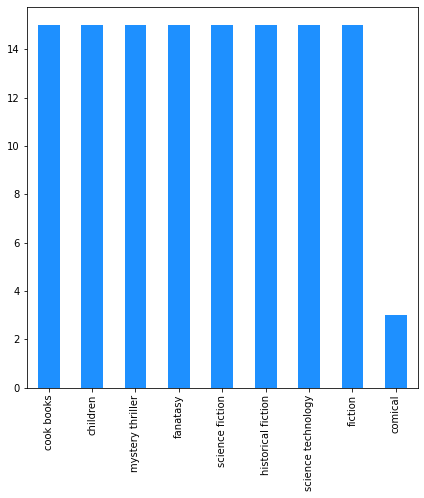

In [10]:
# distributions
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
df['Genre'].value_counts().plot.bar(color='dodgerblue')
plt.show()

The data has fairly equal amount of books in all genres except in comical. Hence, our model should perform nicely in the dataset.

In [11]:
# unique authors
df['Author'].unique()

array([' Katie  Mack', ' R.F. Kuang', ' Stuart Turton', ' Bryant Terry',
       ' Christiana Figueres', ' Heather B. Moore', ' Sarah J. Maas',
       ' Jennifer Weiner', ' Chris Colfer', ' Megan Goldin',
       ' Will Wight', ' Sara Pennypacker', ' Linden A. Lewis',
       ' Natalie Zina Walschots', ' Liz Moore', ' Simone St. James',
       ' Patrik Svensson', ' Alka Joshi', ' T.J. Klune', ' Diane  Cook',
       ' Jim Butcher', ' Jeanine Cummins', ' Kimberly Brubaker Bradley',
       ' Ann Napolitano', ' Sarah Andersen', ' Helen Macdonald',
       ' Neil Shubin', ' Tarryn Fisher', ' Dzung Lewis', ' Gordon Ramsay',
       ' Matt Haig', ' Victoria James', ' Suzanne Redfearn',
       ' Simon Jimenez', ' Raven Leilani', ' Akwaeke Emezi',
       ' Emily St. John Mandel', ' Bill Buford', ' Louise Penny',
       ' Nghi Vo', ' Jessica  Townsend', ' Hank Green',
       ' Michael Shellenberger', ' Katherine Applegate', ' Ricky Tims',
       ' Ken Follett', ' Jonathan C. Slaght', ' Ree Drummond',

In [13]:
# number of unique authors
len(df['Author'].unique())

123

Here we have almost all unique authors, this will have a drawback as it will not be able to recommend books by same author to the user as not more than one book by an author is availble in the dataset.

In [15]:
# importing important libraries and functions
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [54]:
# function to recommend book using title and genre
def recommend_using_genre(title, genre, data):
  """
  Recommends books to user based on title and genre

  Parameters
  ---------
  title : title of the book from which recommendations have to made
  genre : genre of the book passed in title
  data : dataset from which recommendations will be made

  Return
  --------
  sig     : list of recommendations
  """
  # matching genre with the dataset and reset the index
  book_data = data.loc[data['Genre'] == genre]
  book_data.reset_index(level = 0, inplace = True)

  # convert index into series
  indices = pd.Series(book_data.index, index = book_data['Title'])

  # converting book title into vectors
  tf = TfidfVectorizer(analyzer='word', ngram_range=(2,2), min_df=1,
                       stop_words='english')
  tfidf_mat = tf.fit_transform(book_data['Title'])

  # calculating cosine similarity 
  sg = cosine_similarity(tfidf_mat, tfidf_mat)

  # get index corresponding to original title
  idx = indices[title]

  # get pairwise similarity scores
  sig = list(enumerate(sg[idx]))

  # sort the books and keep the top 5 most similar books
  sig = sorted(sig, key=lambda x : x[1], reverse= True)
  sig = sig[1:6]

  return sig

In [55]:
recommend_using_genre(title='The Burning God by R.F. Kuang',genre='fanatasy',data=df)

[(1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0)]

In [56]:
# function to get a list of book title after recommendations
def get_recommendations(title,genre,data):
  """
  
  """
  # matching genre with the dataset and reset the index
  book_data = data.loc[data['Genre'] == genre]
  book_data.reset_index(level = 0, inplace = True)

  # getting recommendations
  recoms = recommend_using_genre(title,genre,data)

  # getiing indexes of book recommendatios
  book_indices = [i[0] for i in recoms]

  # making a list of recommendations
  recommendations = []
  for i in book_indices:
    recommendations.append(book_data['Title'].loc[i])
  return recommendations

In [57]:
get_recommendations(title='The Burning God by R.F. Kuang',genre='fanatasy',data=df)

['House of Earth and Blood by Sarah J. Maas',
 'Wintersteel by Will Wight',
 'The House in the Cerulean Sea by T.J. Klune',
 'Peace Talks by Jim Butcher',
 'The Empress of Salt and Fortune by Nghi Vo']